In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Perform some initial EDA
print("Dimensions of dataset:", df.shape)
print("\nNumber of missing values:\n", df.isna().sum())

Dimensions of dataset: (200, 5)

Number of missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


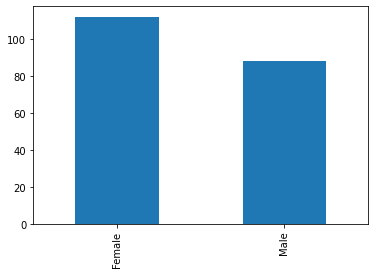

In [4]:
df['Gender'].value_counts().plot(kind='bar')

Slightly more females than males in the dataset but pretty balanced overall.

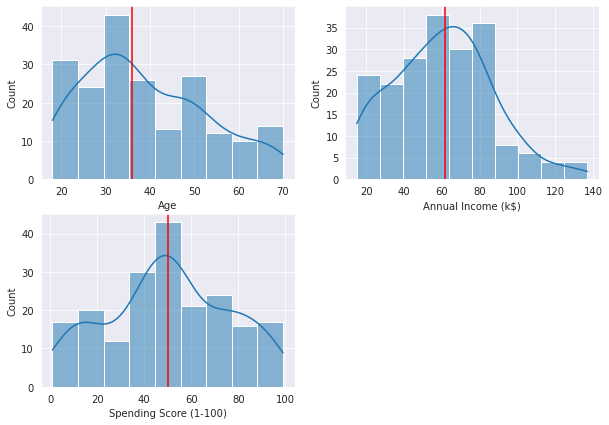

In [5]:
f = plt.figure(figsize=(10, 7))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sns.histplot(data=df, x="Age", kde=True)
    med_age = df['Age'].median()
    plt.axvline(med_age, color='r', linestyle='-')
    
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])
    sns.histplot(data=df, x="Annual Income (k$)", kde=True)
    med_income = df['Annual Income (k$)'].median()
    plt.axvline(med_income, color='r', linestyle='-')
    
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[1, 0])
    sns.histplot(data=df, x="Spending Score (1-100)", kde=True)
    med_score = df['Spending Score (1-100)'].median()
    plt.axvline(med_score, color='r', linestyle='-')

Median shown in red. Here I don't see anything alarming. Age is skewed slightly right with a median age of 36 which is on par with the national median. The median annual income is also fairly close to the national median. Spending score is pretty evenly distributed which makes sense in this scenario.

Text(0.5, 1.0, 'Annual Income vs. Spending Score')

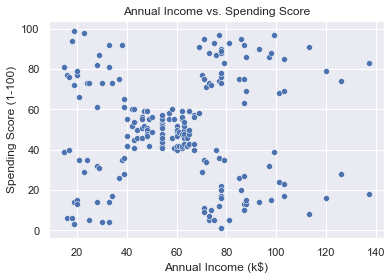

In [18]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title("Annual Income vs. Spending Score")

Here we already see some pretty distinct clusters formed by the relationship between these two variables.

In [12]:
# Pull columns of interest
df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
# There visually appears to be five clusters in the visualization above.
k_means = KMeans(n_clusters = 5).fit(df)

Text(0.5, 1.0, 'Annual Income vs. Spending Score Clusters')

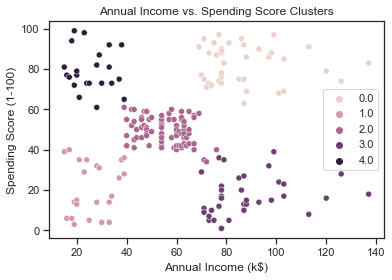

In [30]:
sns.set_style('ticks')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue=k_means.labels_.astype(float))
plt.title("Annual Income vs. Spending Score Clusters")

Now we have five distinct clusters breaking up the customers into groups based on their annual income and spending scores.